# *Import Libraries*

In [9]:
%pip install plotly cufflinks Jinja2

Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks
from matplotlib.colors import ListedColormap
cufflinks.go_offline()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

# *Dataset Info*

In [11]:
df=pd.read_csv('../data engineering/reporting/promotion_report.csv')

*  employeeid = Unique ID for the employee 
*  department = Department of employee 
*  region = Region of employment (unordered) 
*  education = Education Level 
*  gender = Gender of Employee 
*  recruitmentchannel = Channel of recruitment for employee
*  no_ of_ trainings = no of other trainings completed in the previous year on soft skills, technical skills, etc.
*  age = Age of Employee
*  previous_ year_ rating = Employee Rating for the previous year
*  length_ of_ service = Length of service in years
*  awards_ won = if awards won during the previous year then 1 else 0
*  avg_ training_ score = Average score in current training evaluations
*  is_promoted = (Target) Recommended for promotion

In [12]:
df.head(15).style.background_gradient(cmap='YlGnBu',text_color_threshold=0.5)

In [13]:
df.describe().drop(['25%','50%','75%'])

employee_id           age  length_of_service   is_promoted  \
count  54808.000000  54808.000000       54808.000000  54808.000000   
mean   39195.830627     34.803915           5.865512      0.085170   
std    22586.581449      7.660169           4.265094      0.279137   
min        1.000000     20.000000           1.000000      0.000000   
max    78298.000000     60.000000          37.000000      1.000000   

       no_of_trainings  avg_training_score  
count          54808.0        52248.000000  
mean              10.0           63.712238  
std                0.0           13.521910  
min               10.0           39.000000  
max               10.0           99.000000

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   employee_id         54808 non-null  int64  
 1   name                54808 non-null  object 
 2   email               54808 non-null  object 
 3   designation         54808 non-null  object 
 4   age                 54808 non-null  int64  
 5   length_of_service   54808 non-null  int64  
 6   is_promoted         54808 non-null  int64  
 7   no_of_trainings     54808 non-null  int64  
 8   avg_training_score  52248 non-null  float64
dtypes: float64(1), int64(5), object(3)
memory usage: 3.8+ MB


# *Handling Missing Values*

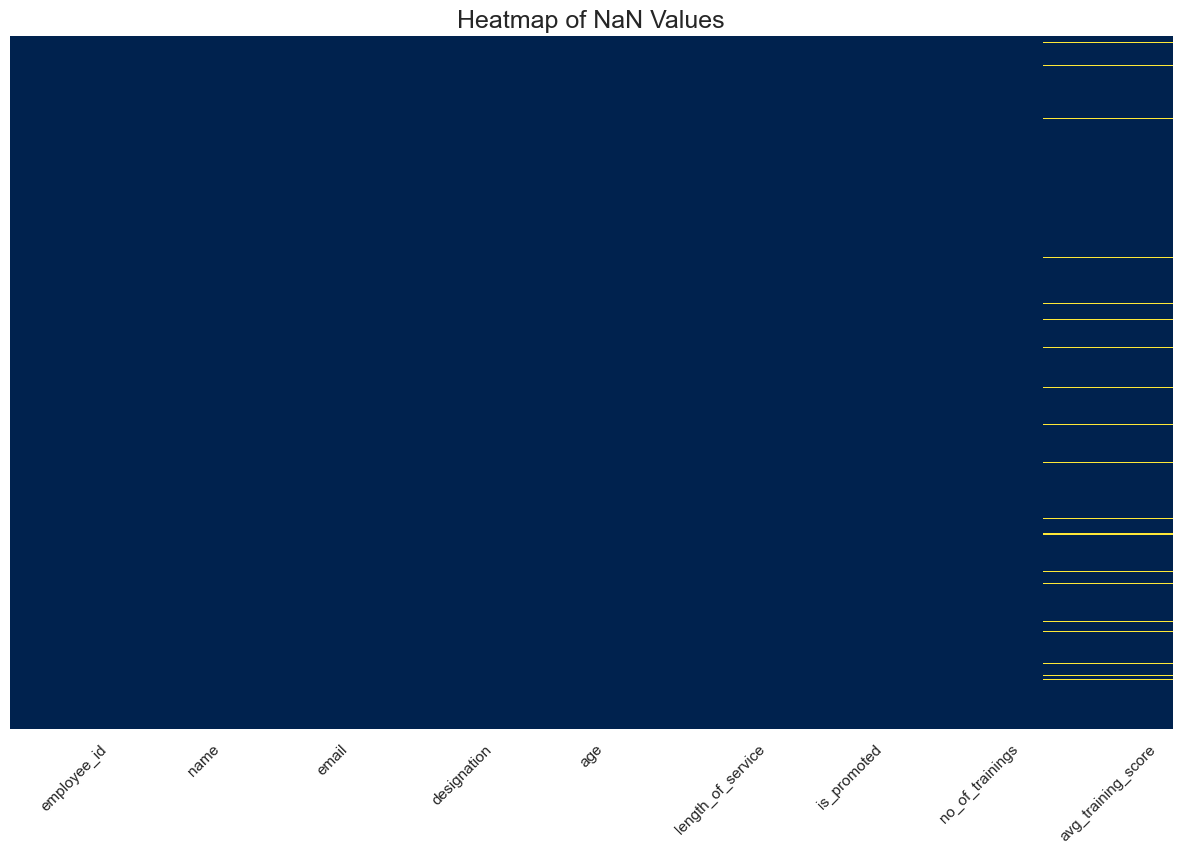

In [15]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull(),cmap='cividis',yticklabels=False,cbar=False)
plt.title('Heatmap of NaN Values',size=18)
plt.xticks(rotation=45);

In [16]:
df.isnull().sum()

employee_id              0
name                     0
email                    0
designation              0
age                      0
length_of_service        0
is_promoted              0
no_of_trainings          0
avg_training_score    2560
dtype: int64

#### *Drop rows that has at least 2 NaN values*

In [17]:
df.dropna(thresh=len(df.columns)-1,inplace=True)
df[df.isnull().any(axis=1)]

employee_id             name                         email  \
31           58536      Tina Brooks                tina@gmail.com   
67           16502     Xander Evans     xander_evans296@gmail.com   
128          42068    Xander Walker      xander_walker4@gmail.com   
159          30106    Grace Johnson    grace_johnson788@gmail.com   
166           4134      Rachel Wood      rachel_wood396@gmail.com   
...            ...              ...                           ...   
54701        23170       Jack White       jack_white514@gmail.com   
54736        38707     Eva Phillips     eva_phillips600@gmail.com   
54746        10546  Isabella Walker  isabella_walker152@gmail.com   
54773        37919       Paul Moore        paul_moore87@gmail.com   
54806        13614     Noah Edwards      noah_edwards12@gmail.com   

             designation  age  length_of_service  is_promoted  \
31               Finance   26                  2            0   
67     Sales & Marketing   27                  1            1   
128           Operations   38                  9            0   
159    Sales & Marketing   32                  4            0   
166    Sales & Marketing   39                  8            0   
...                  ...  ...                ...          ...   
54701  Sales & Marketing   39                 11            0   
54736         Operations   34                  6            0   
54746            Finance   28                  1            0   
54773            Finance   23                  1            0   
54806  Sales & Marketing   29                  2            0   

       no_of_trainings  avg_training_score  
31                  10                 NaN  
67                  10                 NaN  
128                 10                 NaN  
159                 10                 NaN  
166                 10                 NaN  
...                ...                 ...  
54701               10                 NaN  
54736               10                 NaN  
54746               10                 NaN  
54773               10                 NaN  
54806               10                 NaN  

[2560 rows x 9 columns]

#### *Drop rows where education is Nan*

#### *Filling NaN values of previous_year_rating and avg_training score via department*

In [20]:
def refill_score(row):
    dep=row[0]
    score=row[1]
    if pd.isnull(score):
        return df[df['designation']==dep]['avg_training_score'].mean()
    else:
        return score

In [23]:
%%time
df['avg_training_score']=df[['designation','avg_training_score']].apply(refill_score,axis=1)

CPU times: total: 5.47 s
Wall time: 9.37 s


In [24]:
df.reset_index(drop=True,inplace=True)
df

employee_id                name                            email  \
0            65438          Liam Kelly                   liam@gmail.com   
1            65141          Uma Taylor                    uma@gmail.com   
2             7513        Quincy Davis                 quincy@gmail.com   
3             2542        Rachel Smith                 rachel@gmail.com   
4            48945           Sam Smith                    sam@gmail.com   
...            ...                 ...                              ...   
54803         3030      Yvonne Edwards      yvonne_edwards515@gmail.com   
54804        74592   Isabella Phillips   isabella_phillips151@gmail.com   
54805        13918  Catherine Martinez  catherine_martinez355@gmail.com   
54806        13614        Noah Edwards         noah_edwards12@gmail.com   
54807        51526        Bob Martinez        bob_martinez119@gmail.com   

             designation  age  length_of_service  is_promoted  \
0      Sales & Marketing   35                  8            0   
1             Operations   30                  4            0   
2      Sales & Marketing   34                  7            0   
3      Sales & Marketing   39                 10            0   
4             Technology   45                  2            0   
...                  ...  ...                ...          ...   
54803         Technology   48                 17            0   
54804         Operations   37                  6            0   
54805          Analytics   27                  3            0   
54806  Sales & Marketing   29                  2            0   
54807                 HR   27                  5            0   

       no_of_trainings  avg_training_score  
0                   10           49.000000  
1                   10           60.000000  
2                   10           50.000000  
3                   10           50.000000  
4                   10           73.000000  
...                ...                 ...  
54803               10           78.000000  
54804               10           56.000000  
54805               10           79.000000  
54806               10           50.427416  
54807               10           49.000000  

[54808 rows x 9 columns]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'name'),
  Text(1.5, 0, 'email'),
  Text(2.5, 0, 'designation'),
  Text(3.5, 0, 'age'),
  Text(4.5, 0, 'length_of_service'),
  Text(5.5, 0, 'is_promoted'),
  Text(6.5, 0, 'no_of_trainings'),
  Text(7.5, 0, 'avg_training_score')])

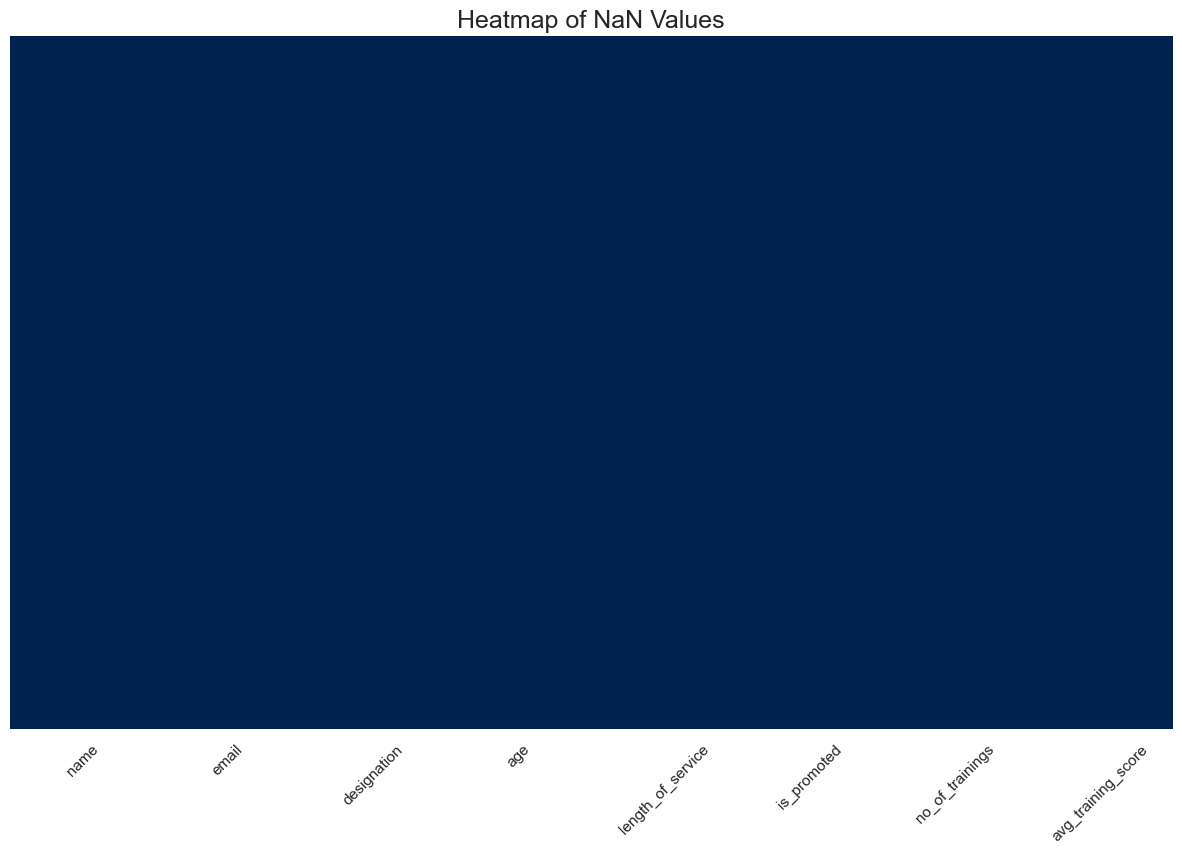

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(df.isnull(),cmap='cividis',yticklabels=False,cbar=False)
plt.title('Heatmap of NaN Values',size=18)
plt.xticks(rotation=45)

#### *Drop unnecessary column*

In [29]:
df.drop('employee_id',axis=1,inplace=True)

KeyError: "['employee_id'] not found in axis"

# *Exploratory Data Analysis*

## *Department Distribution*

In [31]:
px.pie(df, values=df['designation'].value _counts(),names=df['designation'].unique(), title='Designations',width=1000,height=750,color_discrete_sequence=px.colors.sequential.Sunset)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3305406799.py, line 1)

## *Gender Distribution*

In [32]:
plt.figure(figsize=(15,9),dpi=65)
gp=sns.countplot(data=df,x=df['is_promoted'],hue='gender',palette='Set1')
for p in gp.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()+.18
    y = p.get_y() + p.get_height()+ 750
    gp.text((x), (y), int(value), fontsize=14,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='round', linewidth=0.65))
plt.ylabel('Count',size=15)
plt.xlabel('Not Promoted - Promoted',size=15)
plt.title('Gender Distribution',size=20)
plt.legend(title='Gender' ,labels=['Female', 'Male']);

ValueError: Could not interpret value `gender` for `hue`. An entry with this name does not appear in `data`.

<Figure size 975x585 with 0 Axes>

## *Mean Values of Columns*

TypeError: agg function failed [how->mean,dtype->object]

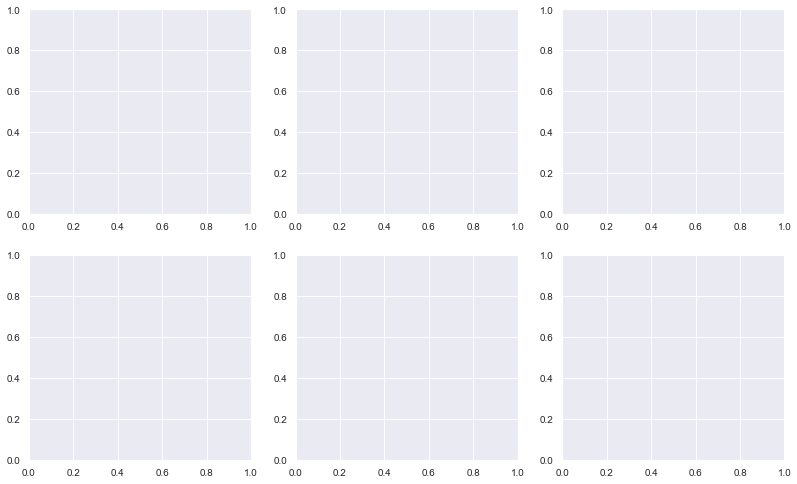

In [33]:
fig,axes=plt.subplots(ncols=3,nrows=2,figsize=(15,9),dpi=65)
ax=[axes[0,0],axes[0,1],axes[0,2],axes[1,0],axes[1,1],axes[1,2]]
tmp_df=df.groupby('is_promoted').mean().reset_index()

for a,c in zip(ax,tmp_df.iloc[:,1:].columns):
    gp=sns.barplot(data=tmp_df,y=c,x='is_promoted',ax=a,palette='winter')
    for p in a.patches:
            x = p.get_x() + p.get_width()-.48
            y = p.get_y() + p.get_height()
            value = str(p.get_height())[:5]
            a.text(x, y, value, ha="left",fontsize=14,bbox=dict(facecolor='#ccddee', edgecolor='black',boxstyle='round', linewidth=0.45))
            a.set_xlabel('Not Promoted - Promoted',size=12)
            
fig.suptitle('Mean Values', fontsize=20)
plt.tight_layout();

## *Average Training Scores of Departments*

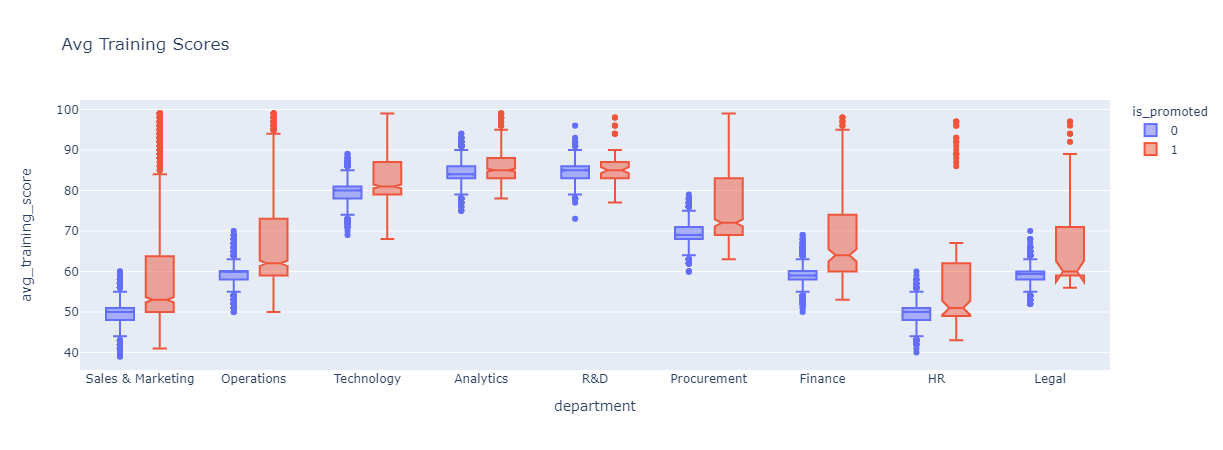

In [37]:
px.box(df, x='department', y='avg_training_score',color='is_promoted',notched=True,title='Avg Training Scores')

## *Region Distribution*

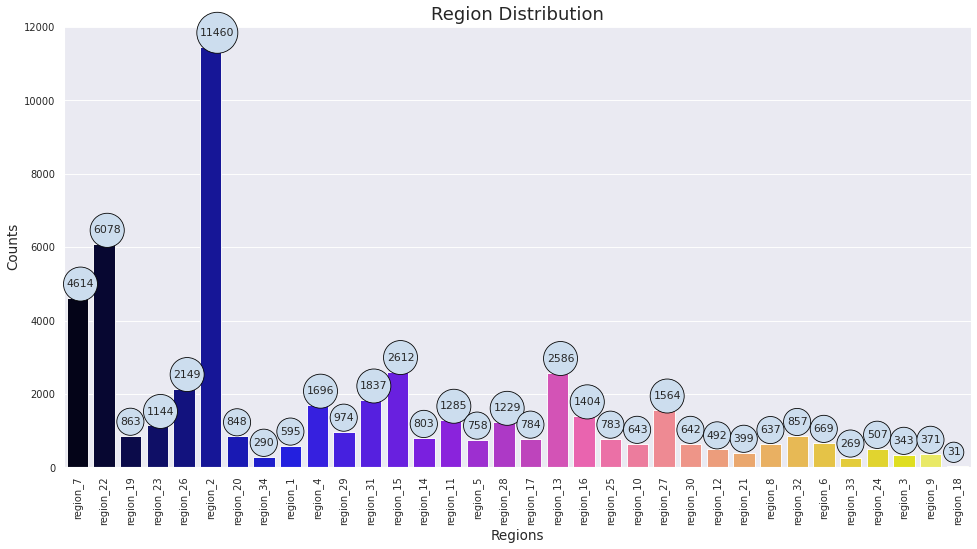

In [38]:
plt.figure(figsize=(18,9),dpi=65)
gp=sns.countplot(x=df['region'],palette='gnuplot2')
for p in gp.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()
    y = p.get_y() + p.get_height()+ 300
    gp.text((x), (y), (value), fontsize=12,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='circle', linewidth=0.9))
plt.xlabel('Regions',size=15)
plt.ylabel('Counts',size=15)
plt.title('Region Distribution',size=20)
plt.xticks(rotation=90);

## *Correlation*

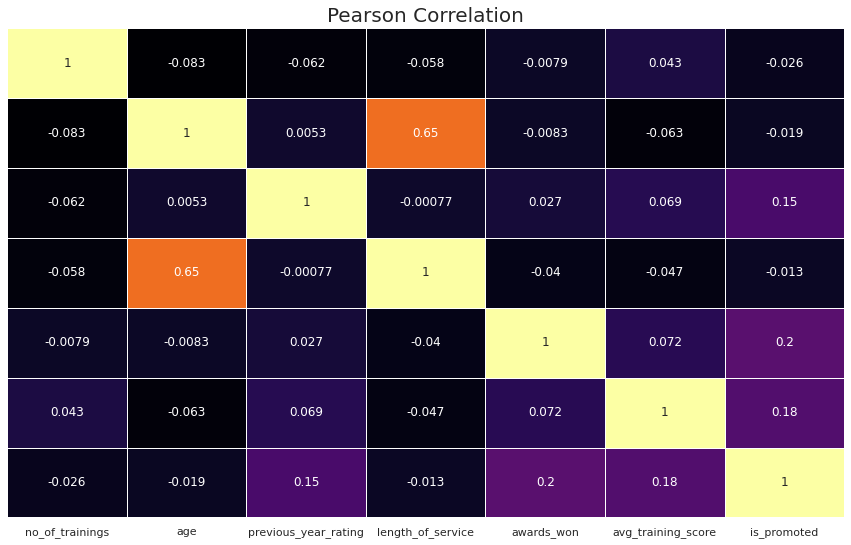

In [39]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(method='pearson'),yticklabels=False,cbar=False,cmap='inferno',annot=True,linewidths=1)
plt.title('Pearson Correlation',size=20);

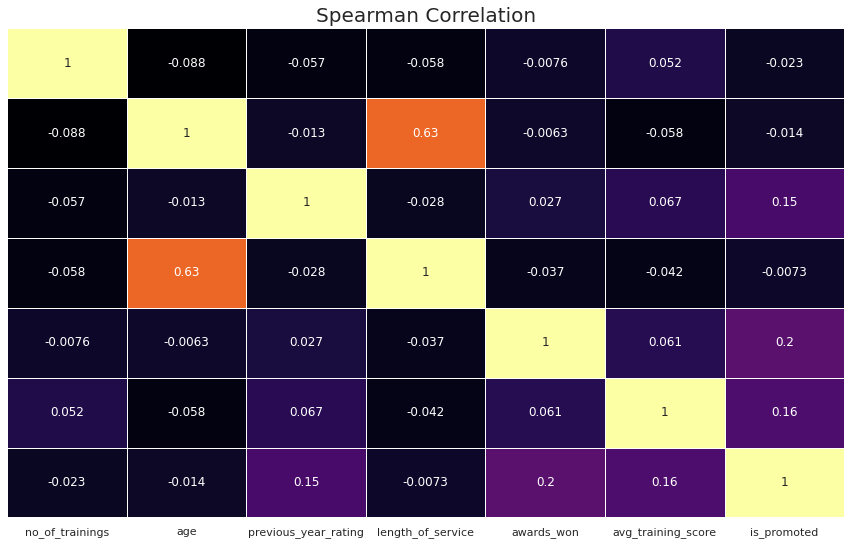

In [40]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(method='spearman'),yticklabels=False,cbar=False,cmap='inferno',annot=True,linewidths=1)
plt.title('Spearman Correlation',size=20);

## *Previous Year Ratings of Educations*

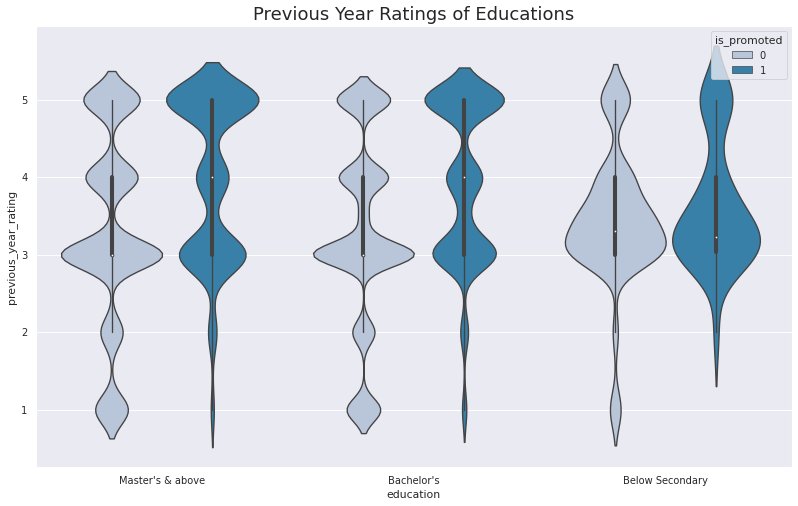

In [41]:
plt.figure(figsize=(15,9),dpi=65)
sns.violinplot(data=df,x=df['education'],y='previous_year_rating',hue='is_promoted',palette='PuBu')
plt.title('Previous Year Ratings of Educations',size=20);

## *Average Training Scores with Age*

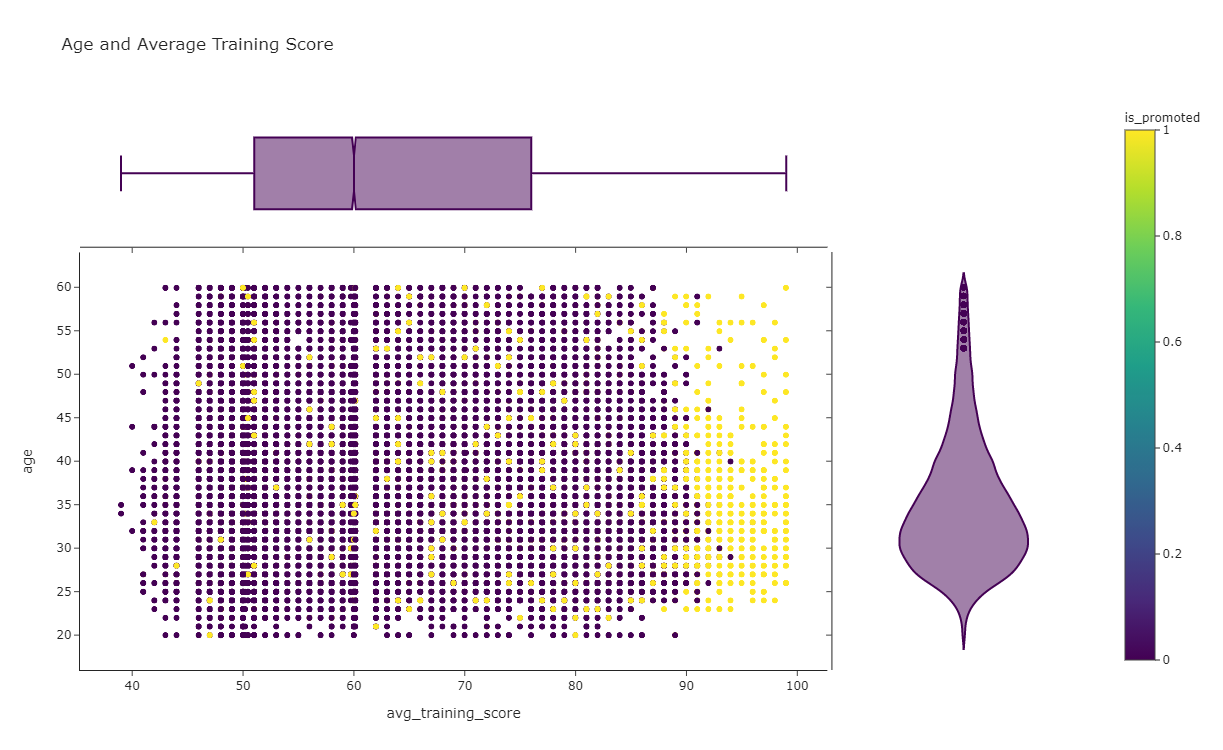

In [42]:
px.scatter(df, x="avg_training_score", y="age", color="is_promoted", marginal_y="violin",
           marginal_x="box", template="simple_white",height=750,title='Age and Average Training Score')

## *Previous Year Rating Distribution*

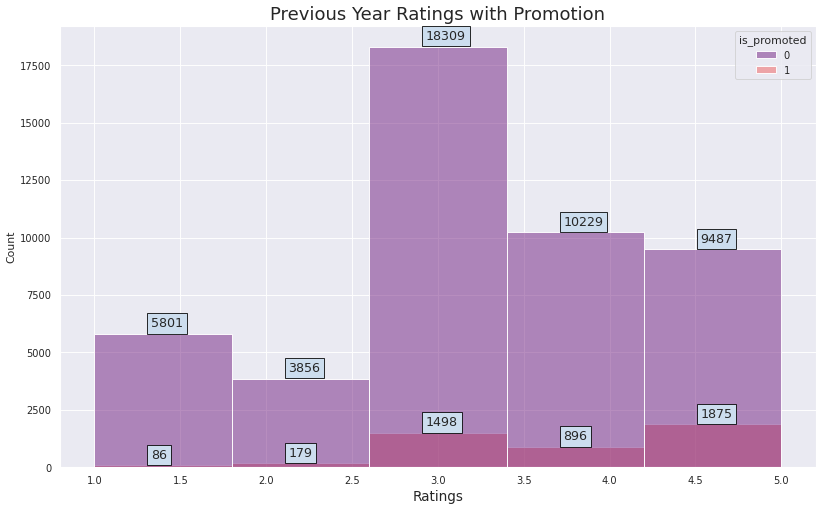

In [43]:
plt.figure(figsize=(15,9),dpi=65)
gp=sns.histplot(data=df,x='previous_year_rating',bins=5,hue='is_promoted',palette='magma',alpha=.5)
for p in gp.patches:
    value=p.get_height() 
    if value <0:
        continue
    x = p.get_x()+.33
    y = p.get_y() + p.get_height()+ 300
    gp.text((x), (y), (value), fontsize=14,bbox=dict(facecolor='#ccddee', edgecolor='black', linewidth=0.9))
plt.title('Previous Year Ratings with Promotion',size=20)
plt.xlabel('Ratings',size=15);

## *Promotion Rate of Regions*

In [45]:
values=[]
for i in df['region'].unique():
    not_promoted=df[df['region']==i]['is_promoted'].value_counts()[0]
    promoted=df[df['region']==i]['is_promoted'].value_counts()[1]
    score=promoted/(promoted+not_promoted)
    values.append(score)
    

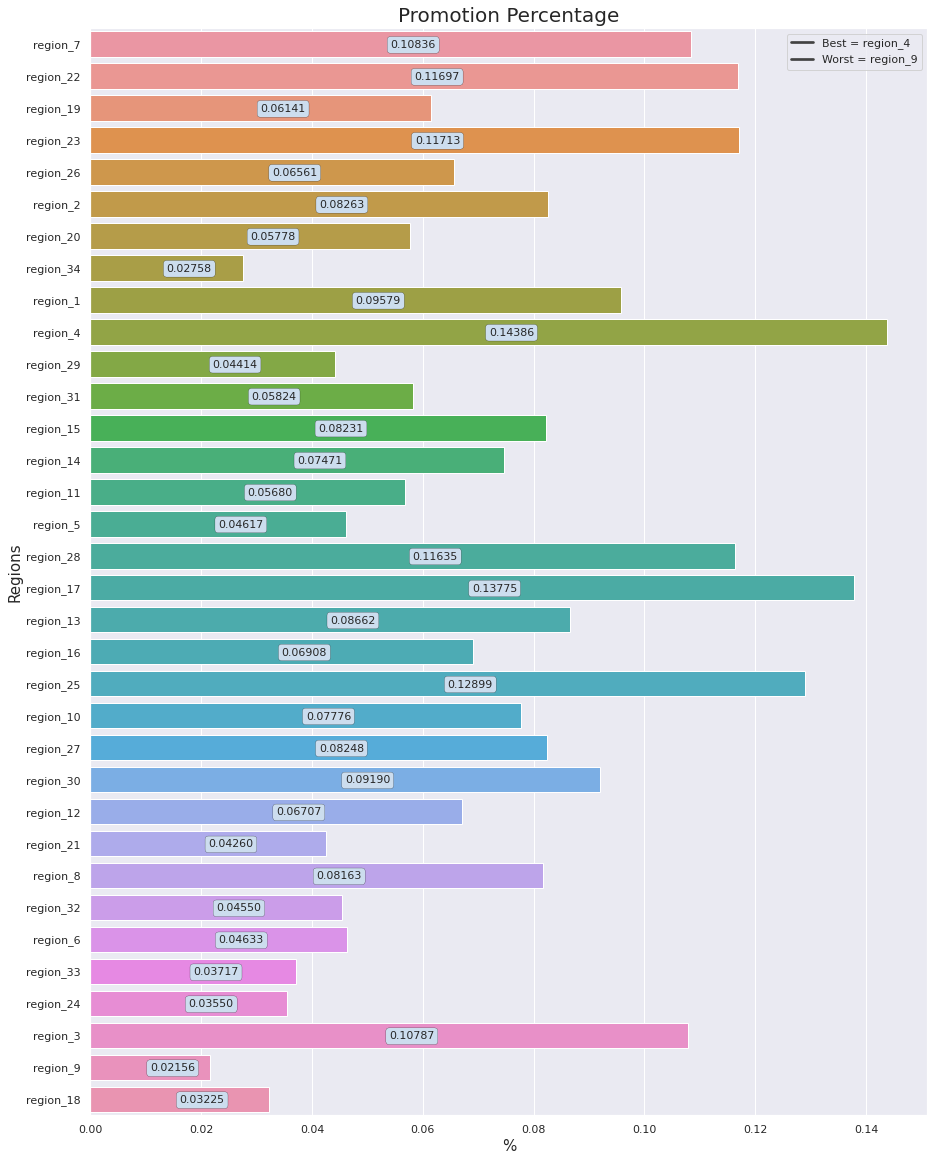

In [48]:
plt.figure(figsize=(15,20))
gp=sns.barplot(y=df['region'].unique(),x=values)
for p in gp.patches:
    value=p.get_width() 
    if value <0:
        continue
    x = value/2
    y = p.get_y() + p.get_height()-.28
    gp.text((x), (y), str(value)[:7], fontsize=11,bbox=dict(facecolor='#ccddee', edgecolor='black', boxstyle='round', linewidth=0.2))
plt.title('Promotion Percentage',size=20)
plt.legend(loc='upper right' ,labels=['Best = region_4', 'Worst = region_9'])
plt.ylabel('Regions',size=15)
plt.xlabel('%',size=15);

#### Seems like region_4 has the highest rate.

## *Parallel Plots of Region 4*

In [49]:
df_r4=df[df['region']=='region_4'].reset_index(drop='True')


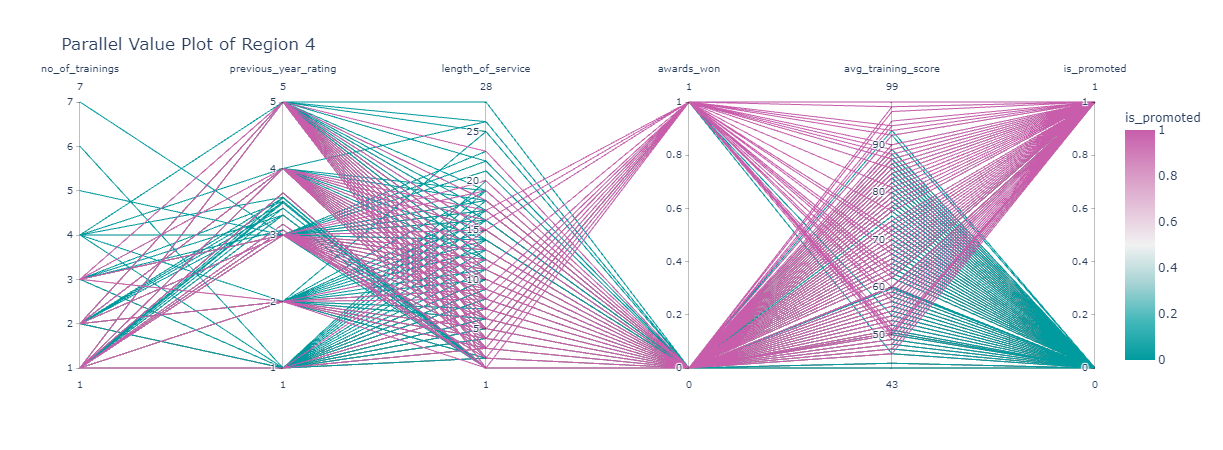

In [50]:
px.parallel_coordinates(df_r4.drop(['age'],axis=1),color='is_promoted',title='Parallel Value Plot of Region 4',color_continuous_scale=px.colors.diverging.Tropic)

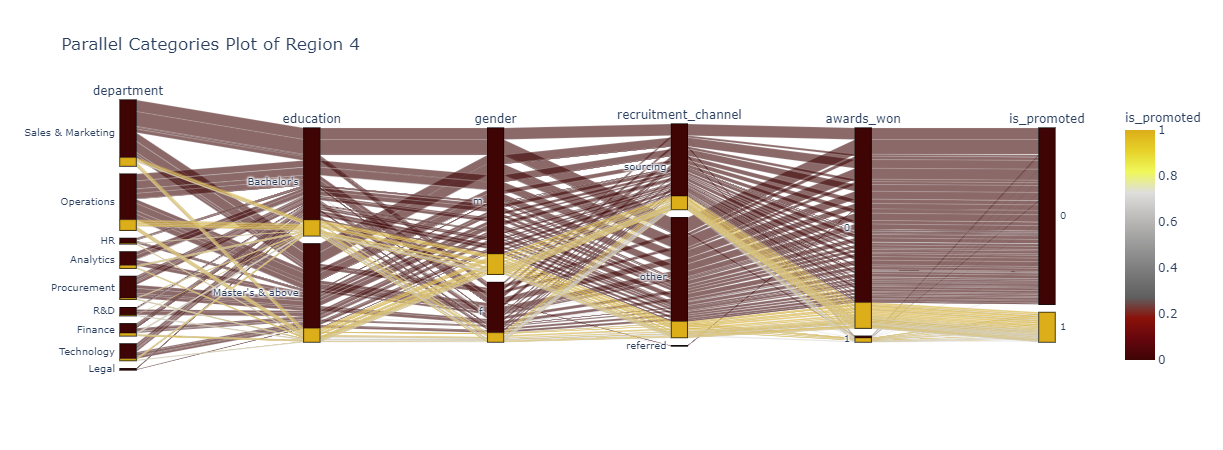

In [51]:
px.parallel_categories(df_r4.drop(['region','age','no_of_trainings','previous_year_rating','length_of_service','avg_training_score'],axis=1),title='Parallel Categories Plot of Region 4',color='is_promoted',color_continuous_scale=px.colors.diverging.oxy)

# *Preprocessing Data*

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

### *Getting Dummies*

In [53]:

df_final=pd.get_dummies(df,drop_first=True)

In [54]:
df_final.head()

no_of_trainings  age  previous_year_rating  length_of_service  awards_won  \
0                1   35                   5.0                  8           0   
1                1   30                   5.0                  4           0   
2                1   34                   3.0                  7           0   
3                2   39                   1.0                 10           0   
4                1   45                   3.0                  2           0   

   avg_training_score  is_promoted  department_Finance  department_HR  \
0                49.0            0                   0              0   
1                60.0            0                   0              0   
2                50.0            0                   0              0   
3                50.0            0                   0              0   
4                73.0            0                   0              0   

   department_Legal  ...  region_region_5  region_region_6  region_region_7  \
0                 0  ...                0                0                1   
1                 0  ...                0                0                0   
2                 0  ...                0                0                0   
3                 0  ...                0                0                0   
4                 0  ...                0                0                0   

   region_region_8  region_region_9  education_Below Secondary  \
0                0                0                          0   
1                0                0                          0   
2                0                0                          0   
3                0                0                          0   
4                0                0                          0   

   education_Master's & above  gender_m  recruitment_channel_referred  \
0                           1         0                             0   
1                           0         1                             0   
2                           0         1                             0   
3                           0         1                             0   
4                           0         1                             0   

   recruitment_channel_sourcing  
0                             1  
1                             0  
2                             1  
3                             0  
4                             0  

[5 rows x 53 columns]

### *Scaling*

In [55]:
sc.fit(df_final.drop('is_promoted',axis=1))
df_sc=pd.DataFrame(sc.transform(df_final.drop('is_promoted',axis=1)),columns=df_final.drop('is_promoted',axis=1).columns)
df_sc['is_promoted']=df['is_promoted']


In [56]:
df_sc

no_of_trainings       age  previous_year_rating  length_of_service  \
0            -0.417919 -0.001059              1.367954           0.479694   
1            -0.417919 -0.657551              1.367954          -0.456222   
2            -0.417919 -0.132357             -0.277298           0.245715   
3             1.213760  0.524135             -1.922550           0.947652   
4            -0.417919  1.311926             -0.277298          -0.924180   
...                ...       ...                   ...                ...   
52211         1.213760 -0.526252             -1.922550          -0.924180   
52212        -0.417919  1.705821             -0.277298           2.585505   
52213        -0.417919  0.261538             -1.099924           0.011736   
52214        -0.417919 -1.051446              1.367954          -0.690201   
52215        -0.417919 -1.051446             -1.922550          -0.222243   

       awards_won  avg_training_score  department_Finance  department_HR  \
0       -0.154022           -1.107546           -0.222733      -0.218581   
1       -0.154022           -0.277295           -0.222733      -0.218581   
2       -0.154022           -1.032068           -0.222733      -0.218581   
3       -0.154022           -1.032068           -0.222733      -0.218581   
4       -0.154022            0.703910           -0.222733      -0.218581   
...           ...                 ...                 ...            ...   
52211   -0.154022           -1.107546           -0.222733      -0.218581   
52212   -0.154022            1.081297           -0.222733      -0.218581   
52213   -0.154022           -0.579204           -0.222733      -0.218581   
52214   -0.154022            1.156774           -0.222733      -0.218581   
52215   -0.154022           -1.107546           -0.222733       4.574962   

       department_Legal  department_Operations  ...  region_region_6  \
0             -0.140726              -0.517949  ...        -0.113923   
1             -0.140726               1.930691  ...        -0.113923   
2             -0.140726              -0.517949  ...        -0.113923   
3             -0.140726              -0.517949  ...        -0.113923   
4             -0.140726              -0.517949  ...        -0.113923   
...                 ...                    ...  ...              ...   
52211         -0.140726              -0.517949  ...        -0.113923   
52212         -0.140726              -0.517949  ...        -0.113923   
52213         -0.140726               1.930691  ...        -0.113923   
52214         -0.140726              -0.517949  ...        -0.113923   
52215         -0.140726              -0.517949  ...        -0.113923   

       region_region_7  region_region_8  region_region_9  \
0             3.211987         -0.11113        -0.084593   
1            -0.311334         -0.11113        -0.084593   
2            -0.311334         -0.11113        -0.084593   
3            -0.311334         -0.11113        -0.084593   
4            -0.311334         -0.11113        -0.084593   
...                ...              ...              ...   
52211        -0.311334         -0.11113        -0.084593   
52212        -0.311334         -0.11113        -0.084593   
52213        -0.311334         -0.11113        -0.084593   
52214        -0.311334         -0.11113        -0.084593   
52215        -0.311334         -0.11113        -0.084593   

       education_Below Secondary  education_Master's & above  gender_m  \
0                      -0.123464                    1.580906 -1.513557   
1                      -0.123464                   -0.632549  0.660695   
2                      -0.123464                   -0.632549  0.660695   
3                      -0.123464                   -0.632549  0.660695   
4                      -0.123464                   -0.632549  0.660695   
...                          ...                         ...       ...   
52211                  -0.123464                   -0.632549  0.6

# *Train-Test Split*

In [57]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [58]:
X=df_final.drop(['is_promoted'],axis=1)
y=df_final['is_promoted']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((41772, 52), (41772,), (10444, 52), (10444,))

In [61]:
y_test.value_counts()

0    9512
1     932
Name: is_promoted, dtype: int64

### *Import ML Models*

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve,plot_precision_recall_curve,roc_auc_score,roc_curve,precision_recall_curve, average_precision_score,plot_precision_recall_curve

# *Predictions*

### *Predictions with Default Parameters*

In [89]:
classifiers=[LogisticRegression(solver='sag'),
             KNeighborsClassifier(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             GradientBoostingClassifier(),
             QuadraticDiscriminantAnalysis(),
             LinearDiscriminantAnalysis()]
names=[str(i).split('(')[0] for i in classifiers]


In [90]:

def predict(clf_list):
    scores=[]
    for i in clf_list:
        i.fit(X_train,y_train)
        print('                ',i)
        print('Score =',i.score(X_test,y_test))
        scores.append(i.score(X_test,y_test))
        print(confusion_matrix(y_test,i.predict(X_test)))
        print(classification_report(y_test,i.predict(X_test)))
        print('*'*80)
    for i in(scores):
        print(i)
    

In [91]:
%%time
predict(classifiers)

                 LogisticRegression(solver='sag')
Score = 0.9174645729605515
[[9491   21]
 [ 841   91]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9512
           1       0.81      0.10      0.17       932

    accuracy                           0.92     10444
   macro avg       0.87      0.55      0.57     10444
weighted avg       0.91      0.92      0.89     10444

********************************************************************************
                 KNeighborsClassifier()
Score = 0.9166028341631559
[[9458   54]
 [ 817  115]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      9512
           1       0.68      0.12      0.21       932

    accuracy                           0.92     10444
   macro avg       0.80      0.56      0.58     10444
weighted avg       0.90      0.92      0.89     10444

*******************************************************************

### *ROC and Precision-Recall Curves*

In [92]:
models=[{'model':LogisticRegression(solver='sag'),
        'name':'Logistic Regression'},
        {'model':KNeighborsClassifier(),
        'name':'KNN'},
       {'model':DecisionTreeClassifier(),
        'name':'Decision Tree'},
       {'model':RandomForestClassifier(),
        'name':'Random Forest'},
       {'model':GradientBoostingClassifier(),
        'name':'Gradient Boosting'},
       {'model':QuadraticDiscriminantAnalysis(),
        'name':'Quadratic Discriminant'},
       {'model':LinearDiscriminantAnalysis(),
        'name':'Linear Discriminant'}]

CPU times: user 27.3 s, sys: 1.32 s, total: 28.6 s
Wall time: 26.3 s


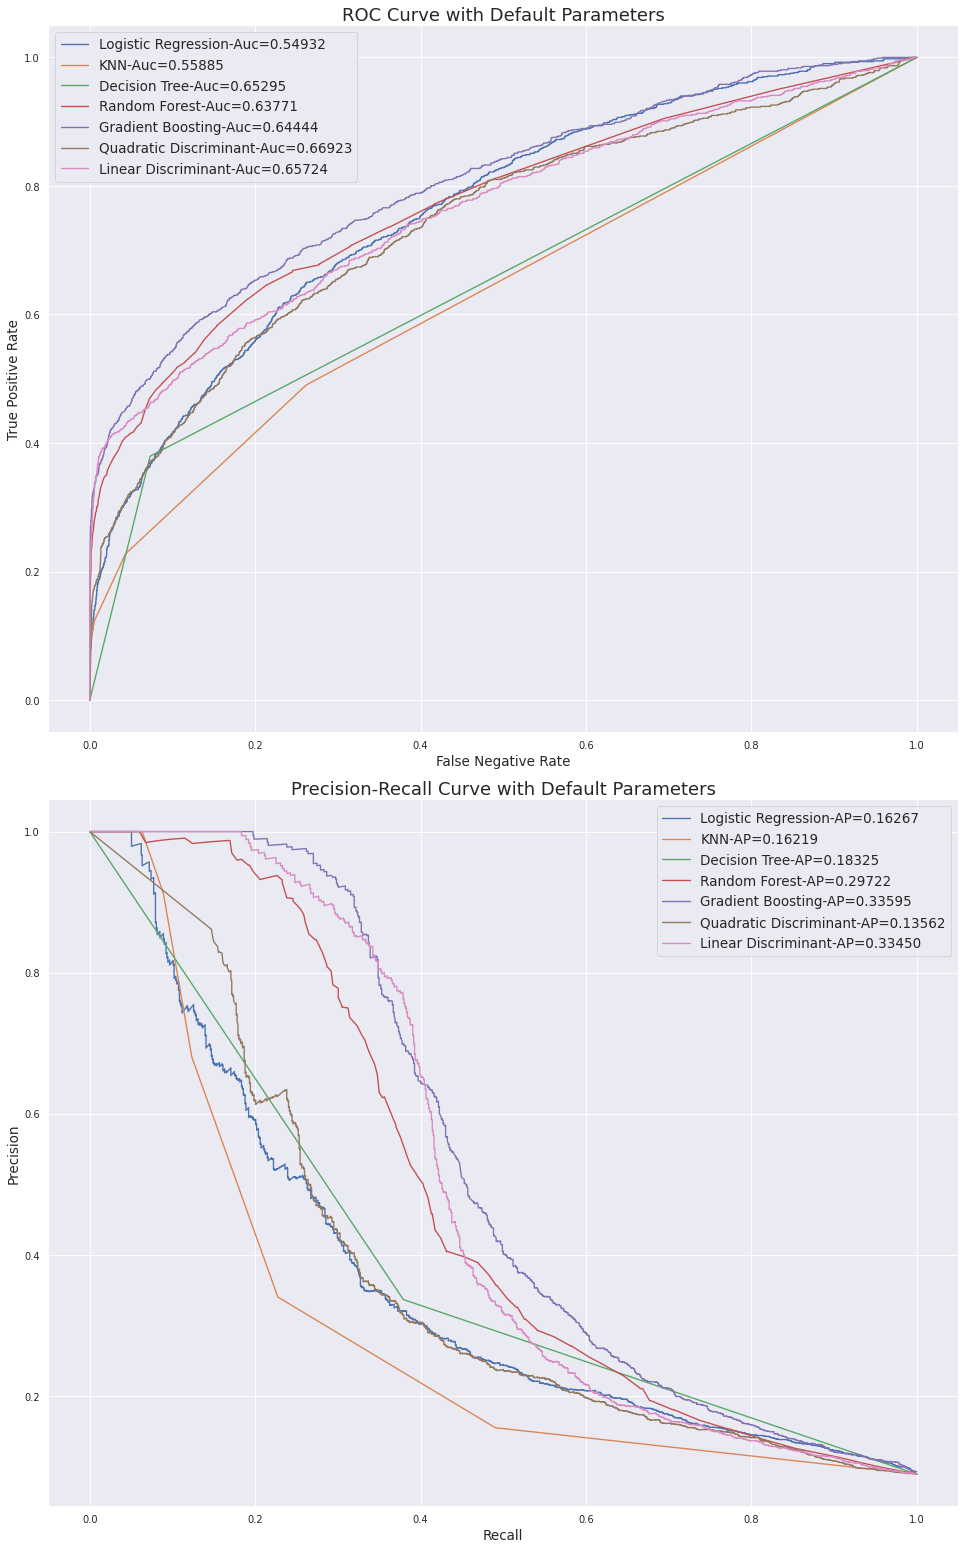

In [93]:
%%time
fig, axes = plt.subplots(ncols=1,nrows=2,figsize=(15,24),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
    
           
              
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve with Default Parameters',size=20)
axes[0].legend(prop={'size': 15});
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve with Default Parameters',size=20)
axes[1].legend(prop={'size': 15});
plt.tight_layout();

# *GridSearchCV*

### GridSearch for Logistic Regression


In [ ]:
grid=GridSearchCV(LogisticRegression(),param_grid={'penalty':('l1', 'l2', 'elasticnet', 'none'),
                                                   'C':[0.00001,0.0001,0.001,0.01,0.1,1],
                                                   'solver' :('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
                                                   'max_iter':[100,200,300]})

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'C': 1e-05, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}

In [96]:
models=[{'model':LogisticRegression(solver='sag'),
         'name':'Logistic Regression'},
        {'model':LogisticRegression(C= 1e-05, max_iter= 100, penalty= 'none', solver= 'newton-cg'),
        'name':'Logistic Regression GridSearch'}]


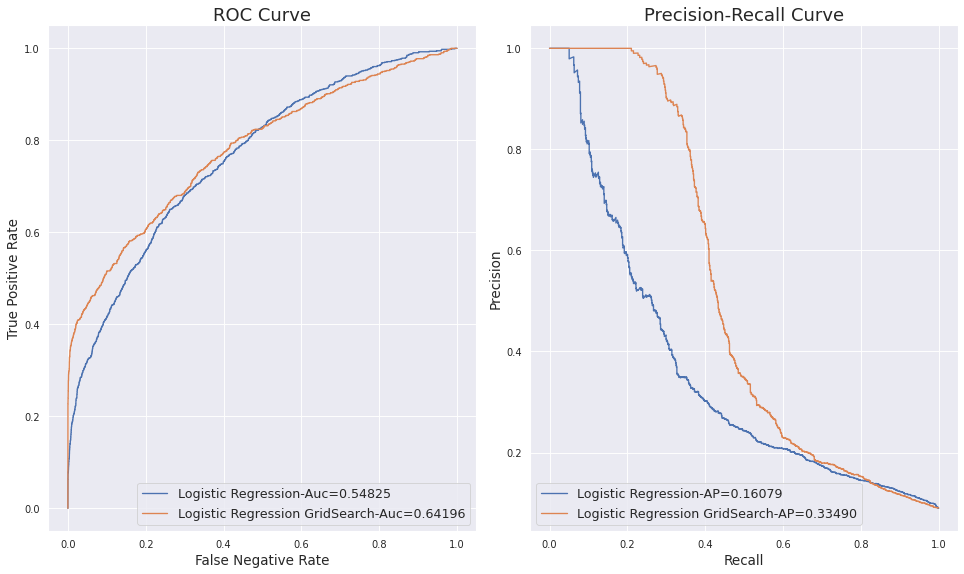

In [97]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch For KNeighbors Classifier

In [ ]:
grid=GridSearchCV(KNeighborsClassifier(),param_grid={ 'weights' : ('uniform', 'distance'),
                                                       'metric':('minkowski','manhattan','chebyshev','euclidean'),
                                                   'algorithm':('auto','ball_tree', 'kd_tree', 'brute' )})

In [ ]:
%%time
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'algorithm': 'auto', 'metric': 'manhattan', 'weights': 'uniform'}

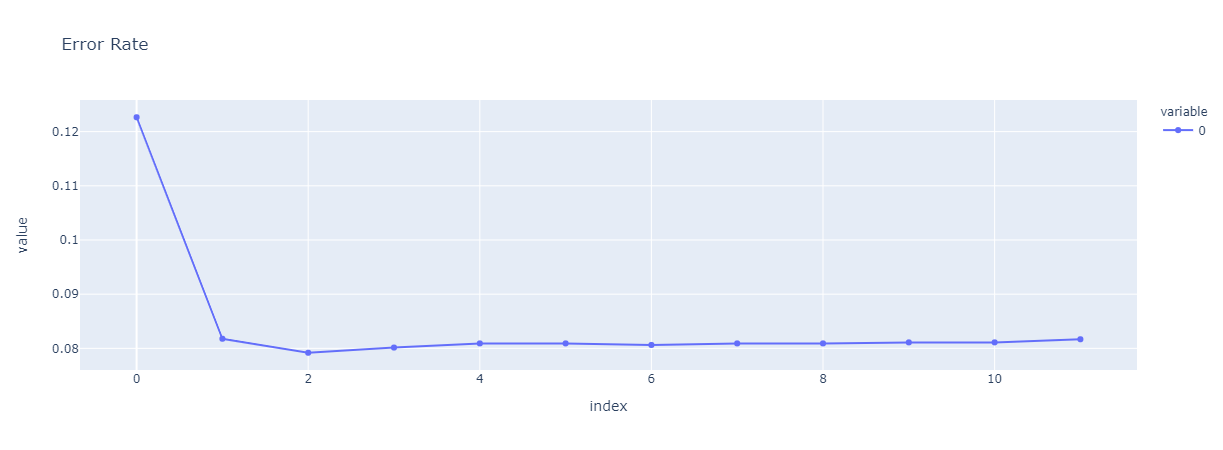

CPU times: user 1min 29s, sys: 6.44 ms, total: 1min 29s
Wall time: 1min 30s


In [100]:
%%time
error_rate=[]
for i in np.arange(1,35,3):
    
    knn_model=KNeighborsClassifier(n_neighbors=i,metric='manhattan',algorithm='auto',weights='uniform')
    knn_model.fit(X_train,y_train)
    y_pred_i=knn_model.predict(X_test)
    error_rate.append(np.mean(y_pred_i !=y_test))
import plotly.express as px

fig = px.line(pd.DataFrame(error_rate),markers=True,title='Error Rate')

fig.show()

In [103]:
models=[{'model':KNeighborsClassifier(),
         'name':'KNeighbors Classifier'},
        {'model':KNeighborsClassifier(n_neighbors=7,metric='manhattan',algorithm='auto',weights='uniform'),
        'name':'KNeighborsClassifier GridSearch'}]

CPU times: user 26.5 s, sys: 263 ms, total: 26.8 s
Wall time: 26.4 s


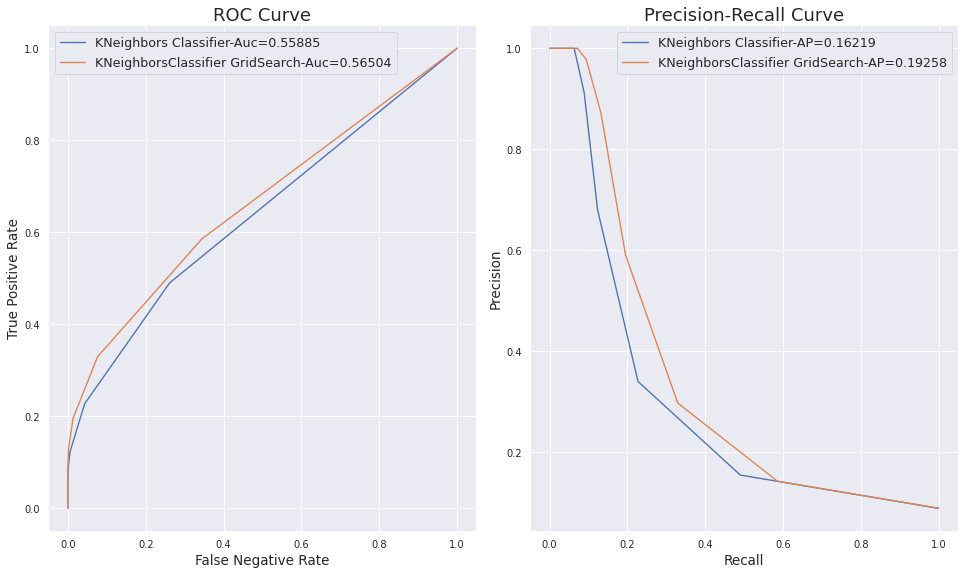

In [104]:
%%time
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch for Decision Tree

In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid={'criterion' : ('gini', 'entropy'),
                                                       'max_depth':range(1,30,2),
                                                       'splitter':('best','random'),
                                                       'min_samples_split':np.arange(1,25,2),
                                                      })

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 29,
 'splitter': 'random'}

In [105]:
models=[{'model':DecisionTreeClassifier(),
         'name':'Decision Tree Classifier'},
        {'model':DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 11,
 min_samples_split= 23,
 splitter= 'best'),
        'name':'Decision Tree Classifier GridSearch'}]

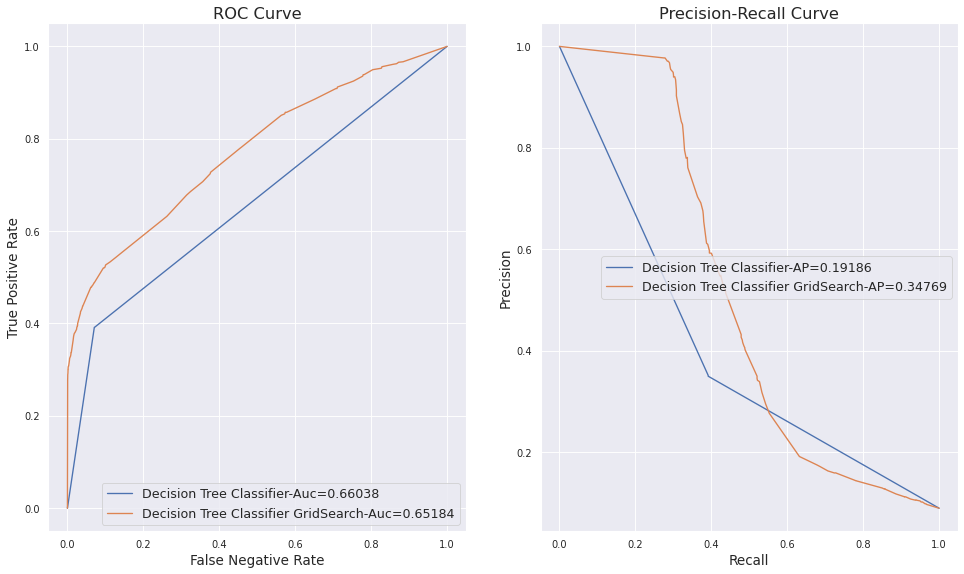

In [106]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=18)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=18)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch for Random Forest

In [ ]:
grid=GridSearchCV(RandomForestClassifier(),param_grid={'criterion' : ('gini', 'entropy'),
                                                       'max_depth':range(1,30,2),'n_estimators':[25,50,100,125,150,250,500],
                                                        'min_samples_split':[3,11,19,27]})

In [ ]:
%%time
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'criterion': 'entropy',
 'max_depth': 29,
 'min_samples_split': 3,
 'n_estimators': 500}

In [107]:
models=[{'model':RandomForestClassifier(),
         'name':'Random Forest Classifier'},
        {'model':RandomForestClassifier(criterion= 'entropy',
 max_depth= 29,
 n_estimators=500,
    min_samples_split=3),
        'name':'Random Forest Classifier GridSearch'}]

CPU times: user 39 s, sys: 398 ms, total: 39.4 s
Wall time: 39 s


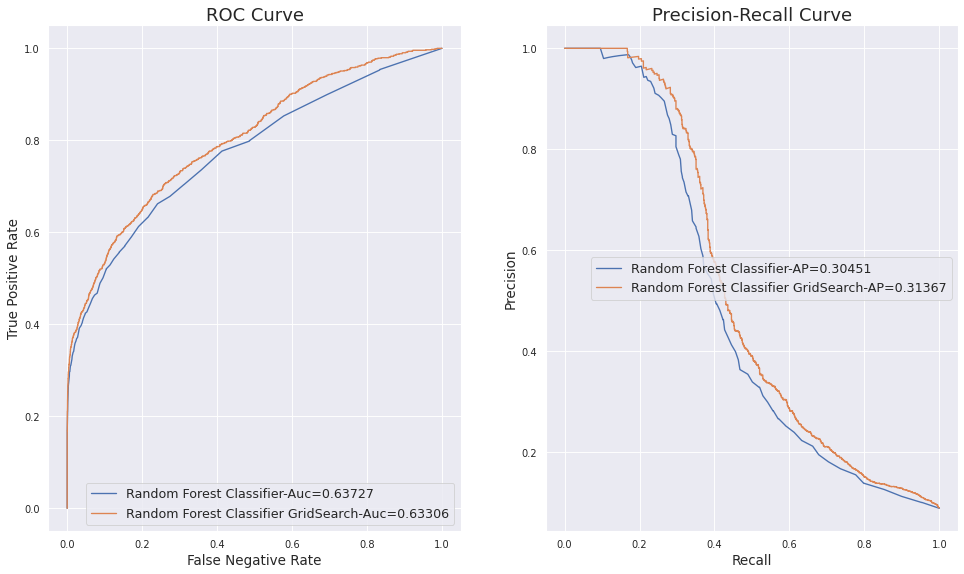

In [108]:
%%time
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch for Gradient Boosting

In [ ]:
grid=GridSearchCV(GradientBoostingClassifier(verbose=1),param_grid={'loss':('deviance', 'exponential'),'n_estimators':[100,500],
                                                           'criterion' : ('friedman_mse', 'mse')
                                                           })                                        

In [ ]:
%%time
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'criterion': 'mse', 'loss': 'exponential', 'n_estimators': 500}

In [109]:
models=[{'model':GradientBoostingClassifier(),
         'name':'Gradient Boosting Classifier'},
        {'model':GradientBoostingClassifier(n_estimators=500,loss= 'exponential',criterion='mse'),
        'name':'Gradient Boosting Classifier GridSearch'}]

CPU times: user 37.6 s, sys: 286 ms, total: 37.9 s
Wall time: 37.5 s


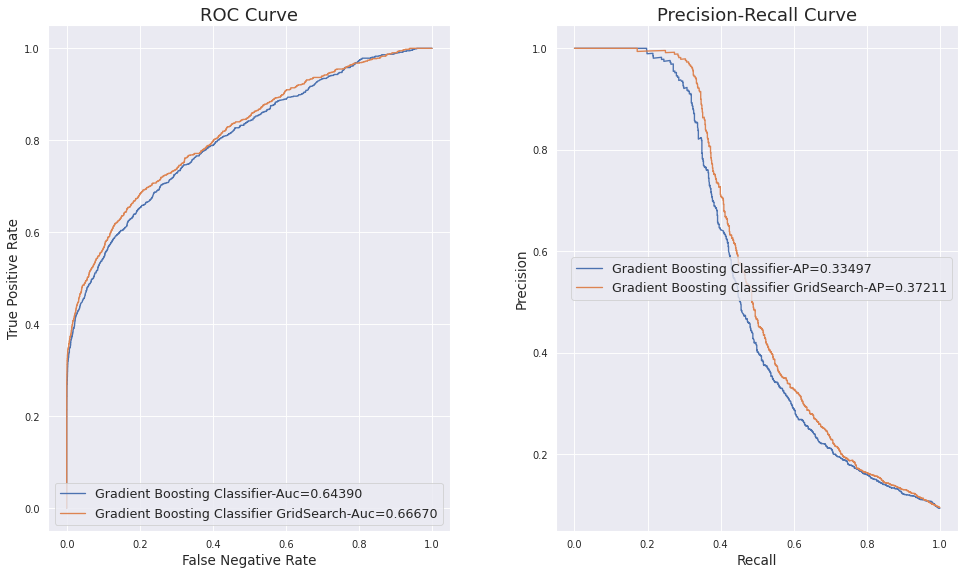

In [110]:
%%time
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch for Quadratic Discriminant Analysis

In [ ]:
grid=GridSearchCV(QuadraticDiscriminantAnalysis(),param_grid={'reg_param':[0.0,.1,.11,.13,.15,.17,.19,.2,.3,.4,.5,.6,.7,.8,.9],
                                                             'store_covariance':(True,False)
                                                             })

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'reg_param': 0.13, 'store_covariance': True}

In [111]:
models=[{'model':QuadraticDiscriminantAnalysis(),
         'name':'Quadratic Discriminant Analysis'},
        {'model':QuadraticDiscriminantAnalysis(reg_param=.13,store_covariance=True),
        'name':'Quadratic Discriminant Analysis GridSearch'}]

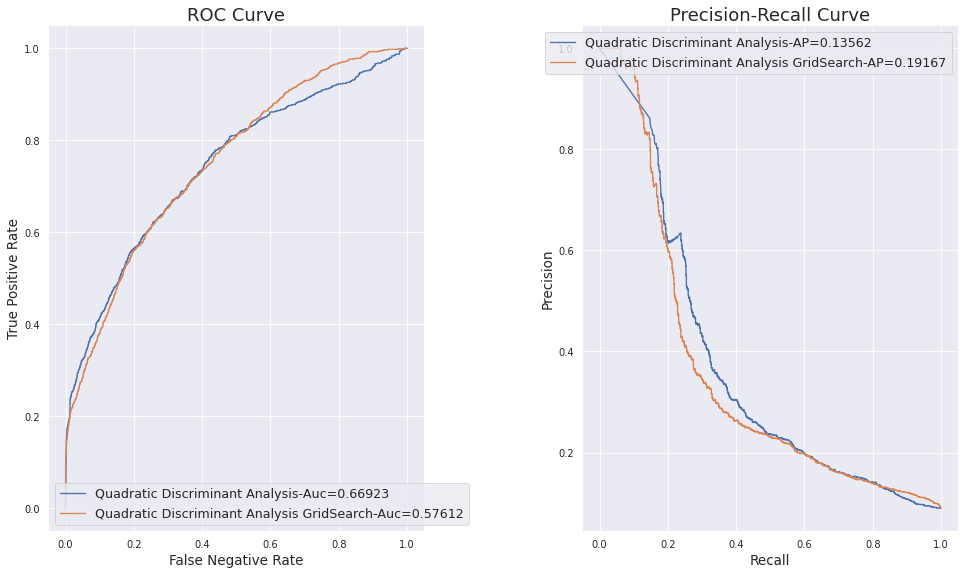

In [112]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

### GridSearch for Linear Discriminant Analysis


In [ ]:
grid=GridSearchCV(LinearDiscriminantAnalysis(),param_grid={'solver' : ('svd', 'lsqr', 'eigen'),
                                                          'n_components' : ['none',1,5,10]})

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
{'n_components': 1, 'solver': 'svd'}

In [113]:
models=[{'model':LinearDiscriminantAnalysis(),
         'name':'Linear Discriminant Analysis'},
        {'model':LinearDiscriminantAnalysis(n_components=1,solver='svd'),
        'name':'Linear Discriminant Analysis GridSearch'}]

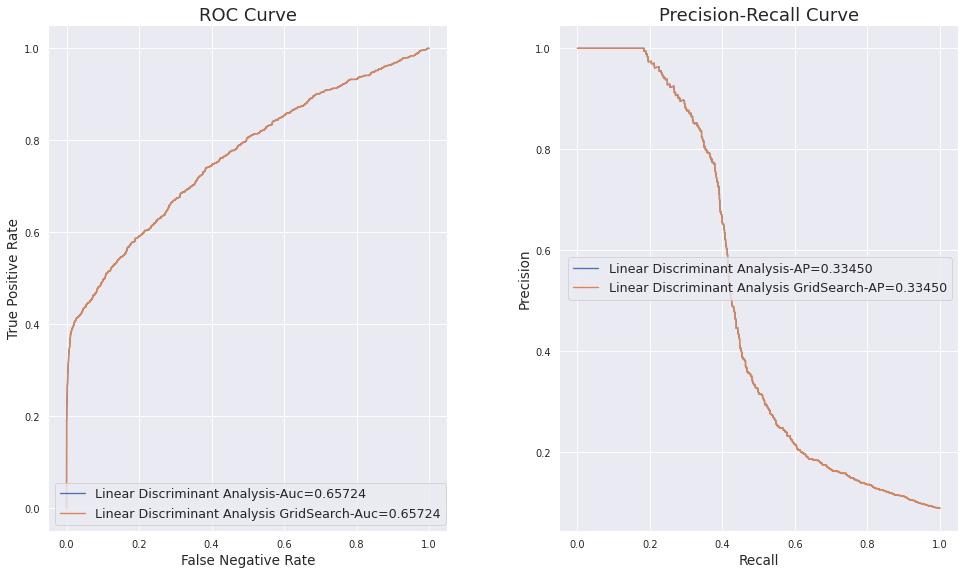

In [114]:
fig, axes = plt.subplots(ncols=2,nrows=1,figsize=(15,9),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve',size=20)
axes[0].legend(prop={'size': 14})
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve',size=20)
axes[1].legend(prop={'size': 14})
plt.tight_layout();

In [115]:
classifiers=[LogisticRegression(C= 1e-05, max_iter= 100, penalty= 'none', solver= 'newton-cg'),
             KNeighborsClassifier(n_neighbors=7,metric='manhattan',algorithm='auto',weights='uniform'),
            DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 11,
 min_samples_split= 23,
 splitter= 'best'),
             RandomForestClassifier(criterion= 'entropy',
 max_depth= 29,
 n_estimators=500,
    min_samples_split=3),
             GradientBoostingClassifier(n_estimators=500,loss= 'exponential',criterion='mse'),
             QuadraticDiscriminantAnalysis(reg_param=.13,store_covariance=True),
             LinearDiscriminantAnalysis(n_components=1,solver='svd')]

In [116]:
%%time
predict(classifiers)

                 LogisticRegression(C=1e-05, penalty='none', solver='newton-cg')
Score = 0.9348908464189966
[[9498   14]
 [ 666  266]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      9512
           1       0.95      0.29      0.44       932

    accuracy                           0.93     10444
   macro avg       0.94      0.64      0.70     10444
weighted avg       0.94      0.93      0.92     10444

********************************************************************************
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7)
Score = 0.9208157793948679
[[9494   18]
 [ 809  123]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      9512
           1       0.87      0.13      0.23       932

    accuracy                           0.92     10444
   macro avg       0.90      0.57      0.59     10444
weighted avg       0.92      0.92      0.89     10444

***

In [117]:
models=[{'model':LogisticRegression(C= 1e-05, max_iter= 100, penalty= 'none', solver= 'newton-cg'),
        'name':'Logistic Regression'},
        {'model':KNeighborsClassifier(n_neighbors=7,metric='manhattan',algorithm='auto',weights='uniform'),
        'name':'KNN'},
       {'model':DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 11,
 min_samples_split= 23,
 splitter= 'best'),
        'name':'Decision Tree'},
       {'model':RandomForestClassifier(criterion= 'entropy',
 max_depth= 29,
 n_estimators=500,
    min_samples_split=3),
        'name':'Random Forest'},
       {'model':GradientBoostingClassifier(n_estimators=500,loss= 'exponential',criterion='mse'),
        'name':'Gradient Boosting'},
       {'model':QuadraticDiscriminantAnalysis(reg_param=.13,store_covariance=True),
        'name':'Quadratic Discriminant'},
       {'model':LinearDiscriminantAnalysis(n_components=1,solver='svd'),
        'name':'Linear Discriminant'}]

CPU times: user 1min 35s, sys: 6.01 s, total: 1min 41s
Wall time: 1min 26s


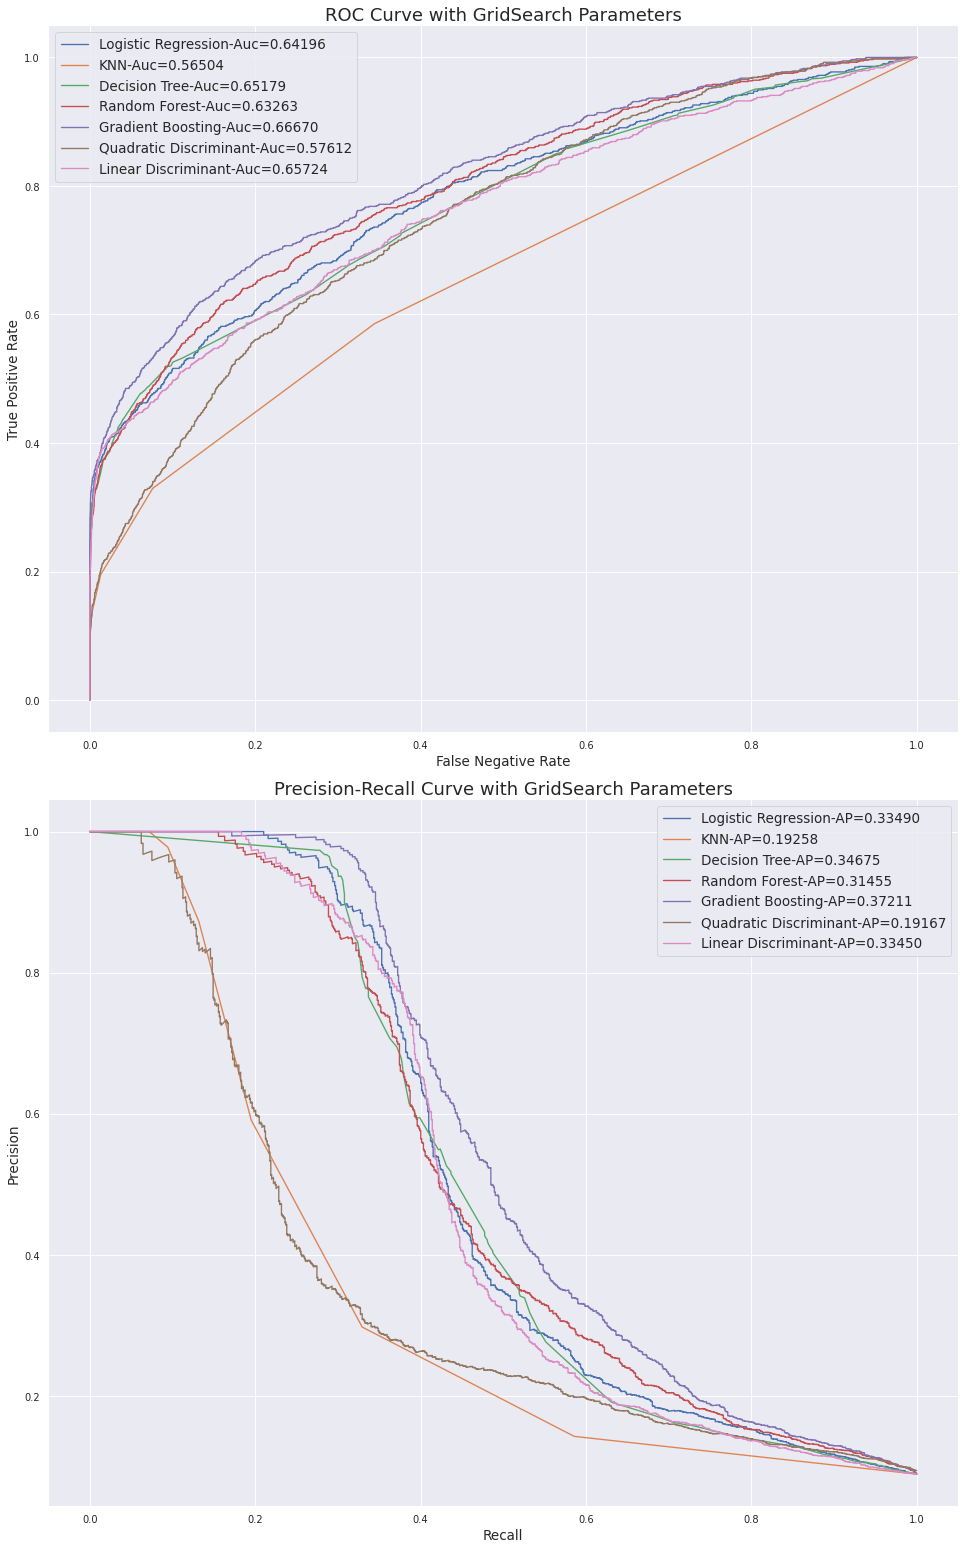

In [118]:
%%time
fig, axes = plt.subplots(ncols=1,nrows=2,figsize=(15,24),dpi=65)
for m in models:
    
        m['model'].fit(X_train,y_train)
        y_pred=m['model'].predict(X_test) 
        fpr, tpr, thresholds = roc_curve(y_test, m['model'].predict_proba(X_test)[:,1])
        precision, recall, _ = precision_recall_curve(y_test,  m['model'].predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test,y_pred)
        ap = average_precision_score(y_test, y_pred)
        axes[0].plot(fpr,tpr, label=str(m['name'])+'-Auc='+str(auc)[:7])
        axes[1].plot(recall,precision, label=str(m['name'])+'-AP='+str(ap)[:7])
    
           
              
axes[0].set_ylabel('True Positive Rate',size=15)
axes[0].set_xlabel('False Negative Rate',size=15)
axes[0].set_title('ROC Curve with GridSearch Parameters',size=20)
axes[0].legend(prop={'size': 15});
axes[1].set_ylabel('Precision',size=15)
axes[1].set_xlabel('Recall',size=15)
axes[1].set_title('Precision-Recall Curve with GridSearch Parameters',size=20)
axes[1].legend(prop={'size': 15})
plt.tight_layout();

In [119]:
scores=[0.9348908464189966, 
 0.9204327843738032, 
 0.9360398314821907, 
 0.9332631175794714, 
 0.9390080428954424, 
 0.919858291842206, 
 0.9345078513979318]

In [120]:
models=(str(i).split('(')[0] for i in classifiers)

In [121]:
df_=pd.DataFrame(data=scores,columns=['Score'],index=models)

In [122]:
df_

Score
LogisticRegression             0.934891
KNeighborsClassifier           0.920433
DecisionTreeClassifier         0.936040
RandomForestClassifier         0.933263
GradientBoostingClassifier     0.939008
QuadraticDiscriminantAnalysis  0.919858
LinearDiscriminantAnalysis     0.934508

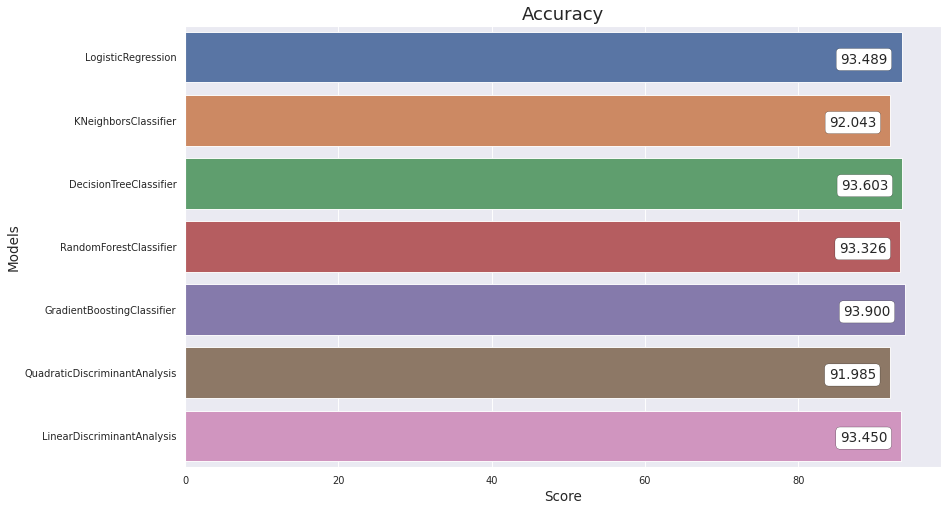

In [124]:
plt.figure(figsize=(15,9),dpi=65)
gp=sns.barplot(x='Score',y=df_.index,data=df_*100)
for p,s in zip(gp.patches,scores):
        value = str(s*100)[:6]
        x = p.get_x()+s*100-8
        y = p.get_y() + p.get_height()-.3
        
        gp.text(x, y, value, ha="left",fontsize=15,bbox=dict(facecolor='#ffffff', edgecolor='black',boxstyle='round', linewidth=0.25))
plt.xlabel('Score',size=15)
plt.ylabel('Models',size=15)
plt.title('Accuracy',size=20);